In [ ]:
from src.metrics import revenue_by_city, top_cities

In [1]:
import pandas as pd

data = pd.read_csv("ecommerce_sales.csv")
data.head()


,order_id,date,city,category,price,units,revenue
0,100000,2024-04-19,Stockholm,Sports,530.95,4,2123.80
1,100001,2024-05-06,Malmö,Sports,653.28,3,1959.84
2,100002,2024-03-07,Uppsala,Clothing,177.98,4,711.92
3,100003,2024-04-08,Göteborg,Home,348.57,3,1045.71
4,100004,2024-01-18,Uppsala,Electronics,777.07,3,2331.21


In [2]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  2500 non-null   int64  
 1   date      2500 non-null   object 
 2   city      2500 non-null   object 
 3   category  2500 non-null   object 
 4   price     2500 non-null   float64
 5   units     2500 non-null   int64  
 6   revenue   2500 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 136.8+ KB


,order_id,price,units,revenue
count,2500.00000,2500.000000,2500.000000,2500.000000
mean,101249.50000,476.213212,2.985200,1401.106892
std,721.83216,312.968413,1.429755,1166.944967
min,100000.00000,50.000000,1.000000,50.000000
25%,100624.75000,254.960000,2.000000,577.960000
50%,101249.50000,413.045000,3.000000,1088.690000
75%,101874.25000,624.427500,4.000000,1884.750000
max,102499.00000,2092.530000,9.000000,9192.600000


In [3]:
# Gruppindelning: räkna ihop intäkt, antal produkter och ordrar per stad
city_data = data.groupby("city").agg(
    total_revenue=("revenue", "sum"),
    total_units=("units", "sum"),
    orders=("order_id", "nunique")
).reset_index()

# Sortera städerna från högst till lägst intäkt
city_data = city_data.sort_values("total_revenue", ascending=False)

# Visa resultatet
city_data


,city,total_revenue,total_units,orders
2,Stockholm,1227201.94,2619,899
0,Göteborg,859019.65,1788,586
1,Malmö,567926.32,1211,396
3,Uppsala,551478.42,1165,381
4,Västerås,297140.90,680,238


### Intäkt per stad
Den här tabellen visar total intäkt, antal sålda enheter och unika ordrar per stad. Här kan vi se vilka städer som står för störst del av försälningen

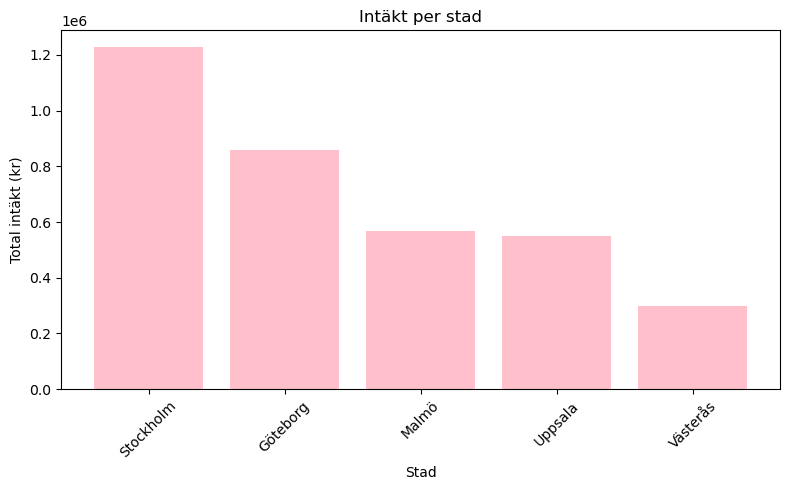

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(city_data["city"], city_data["total_revenue"], color="pink")
plt.title("Intäkt per stad")
plt.xlabel("Stad")
plt.ylabel("Total intäkt (kr)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualisering: Intäkt per stad
Denna stapeldiagram visar att Stockholm står för den hösta intäkten, följt av Göteborg och Malmö.